## Python数据分析第一天（1）

In [2]:
# 用随机的方式生成5个学生3门课程的考试成绩，完成下列操作:
##1.统计每个学生的考试平均分
##2.统计每门课的最高分、最低分、标准差
##3.将学生及其考试成绩以行的方式输出(按平均分从高到低排序)

In [3]:
names = ['孙悟空','李元芳','白起','狄仁杰','达摩']
courses = ['语文','数学','英语']

In [4]:
import random

scores = [[random.randrange(60,101) for _ in range(3)]for _ in range(5)]# randint 是两边都闭的区间，不用
scores

[[76, 81, 93], [94, 98, 70], [98, 67, 66], [82, 77, 80], [60, 98, 82]]

In [5]:
def mean(nums):
    """求均值"""
    return sum(nums) / len(nums)

def variance(nums):
    """求方差"""
    mean_value = mean(nums)
    return mean([(num - mean_value) ** 2 for num in nums])

def stddev(nums):
    """求标准差"""
    return variance(nums) ** 0.5


In [6]:
# 统计每个学生的考试平均分
for idx,name in enumerate(names):
    temp = scores[idx]
    avg_score = mean(temp)
    print(f'{name}考试平均分为：{avg_score:.1f}分')

孙悟空考试平均分为：83.3分
李元芳考试平均分为：87.3分
白起考试平均分为：77.0分
狄仁杰考试平均分为：79.7分
达摩考试平均分为：80.0分


In [7]:
# 统计每门课的最高分，最低分，标准差

In [8]:
for idx,course in enumerate(courses):
    temp = [scores[i][idx] for i in range(len(names))]
    max_score,min_score = max(temp),min(temp)
    print(f'{course}成绩最高分：{max_score}分')
    print(f'{course}成绩最低分：{min_score}分')
    print(f'{course}成绩标准差：{stddev(temp)}')

语文成绩最高分：98分
语文成绩最低分：60分
语文成绩标准差：13.564659966250536
数学成绩最高分：98分
数学成绩最低分：67分
数学成绩标准差：12.155657119218196
英语成绩最高分：93分
英语成绩最低分：66分
英语成绩标准差：9.516301802696255


In [9]:
# 将学生及其考试成绩以行的形式输出（按平均分从高到低排序）
results = {name : temp for name,temp in zip(names,scores)}
sorted_keys = sorted(results,key=lambda x:mean(results[x]),reverse=True)
for key in sorted_keys:
    verbal,math,english = results[key]
    print(f'{key}\t{verbal}\t{math}\t{english}')

李元芳	94	98	70
孙悟空	76	81	93
达摩	60	98	82
狄仁杰	82	77	80
白起	98	67	66


In [10]:
# NumPy----保存数据，完成批量运算和处理
## pandas-----封装了数据分析需要的各种方法
## matplotlib-----绘制统计图表

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
np.__version__

'2.2.4'

In [13]:
pd.__version__

'2.2.3'

In [14]:
# list ----> 嵌套列表
scores

[[76, 81, 93], [94, 98, 70], [98, 67, 66], [82, 77, 80], [60, 98, 82]]

In [15]:
# 通过array函数将list处理成ndarray对象
scores = np.array(scores)
scores

array([[76, 81, 93],
       [94, 98, 70],
       [98, 67, 66],
       [82, 77, 80],
       [60, 98, 82]])

In [16]:
type(scores)

numpy.ndarray

In [17]:
np.round(scores.mean(axis=1))

array([83., 87., 77., 80., 80.])

In [18]:
scores.max(axis=0)

array([98, 98, 93])

In [19]:
scores_df = pd.DataFrame(data=scores,columns=courses,index=names)
scores_df

,语文,数学,英语
孙悟空,76,81,93
李元芳,94,98,70
白起,98,67,66
狄仁杰,82,77,80
达摩,60,98,82


In [20]:
np.round(scores_df.mean(axis=1),1)

孙悟空    83.3
李元芳    87.3
白起     77.0
狄仁杰    79.7
达摩     80.0
dtype: float64

In [21]:
scores_df['平均分'] = np.round(scores_df.mean(axis=1),1)
scores_df

,语文,数学,英语,平均分
孙悟空,76,81,93,83.3
李元芳,94,98,70,87.3
白起,98,67,66,77.0
狄仁杰,82,77,80,79.7
达摩,60,98,82,80.0


In [22]:
scores_df.to_excel('考试成绩表.xlsx')

In [30]:
plt.rcParams['font.sans-serif'] = ['Songti SC','SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [34]:
%config InlineBackend.figure_format = 'svg'

<Figure size 960x720 with 0 Axes>

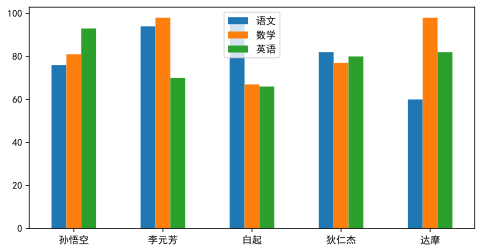

In [37]:
plt.figure(dpi=150)
# 生成柱状图
scores_df.plot(figsize=(8,4),kind='bar',y=['语文','数学','英语'])
# 旋转横轴的刻度
plt.xticks(rotation=0)
# 保存图表
plt.savefig('成绩柱状图.svg')
# 显示图表
plt.show()